<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/HateSpeechClassificationNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Activation, Dropout, Input, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import pad_sequences
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df=pd.read_csv('/content/labeled_data.csv')

In [5]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<Axes: xlabel='hate_speech', ylabel='count'>

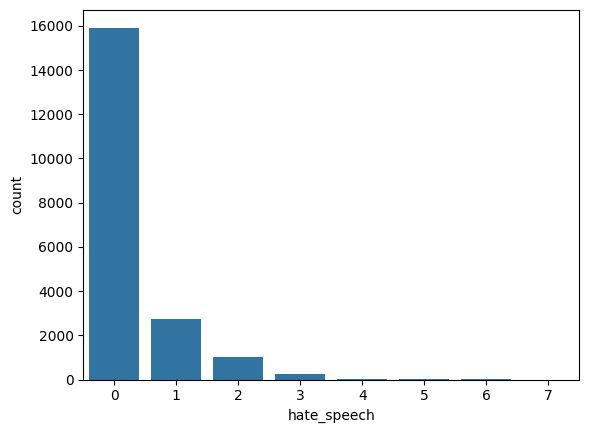

In [6]:
sns.countplot(x='hate_speech',data=df)

In [7]:
df.shape

(19971, 7)

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [9]:
df.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [10]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
df['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

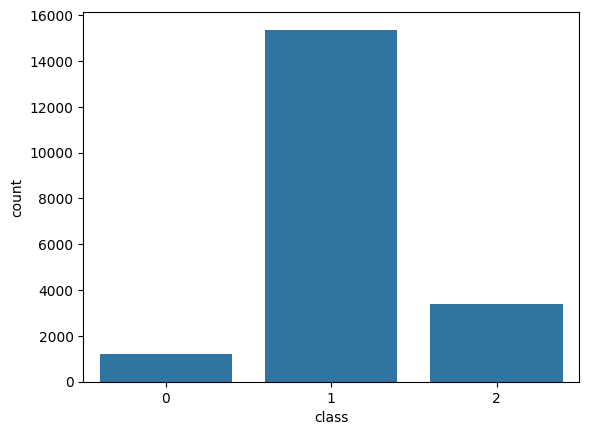

In [12]:
sns.countplot(x='class',data=df)

In [13]:
imbalanced_df=pd.read_csv('/content/TwitterHate.csv')

In [14]:
imbalanced_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

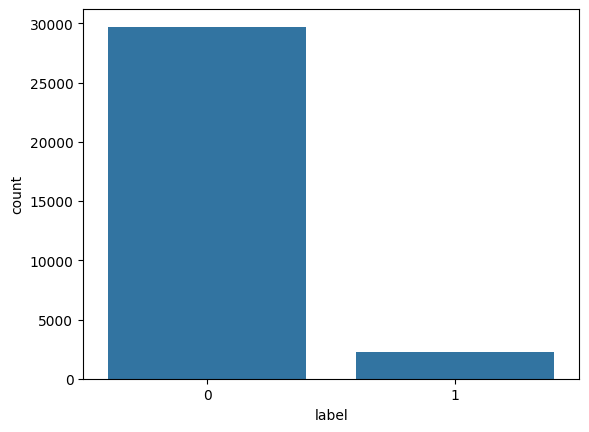

In [15]:
sns.countplot(x='label',data=imbalanced_df)

In [16]:
df[df['class']==0]['class']=1

<ipython-input-16-42c289432824>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['class']==0]['class']=1


In [17]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [18]:
df['class'].unique()

array([2, 1, 0])

In [19]:
df[df['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
19897,0,RT @realist_iLLest: Mine too &#128513;&#128588...
19955,0,RT @s_bitchy: Bitches be fallin so Inlove w. N...
19960,0,RT @salmeron_bryan: You're not the father ! Wh...
19962,0,RT @salomanizor: Too many faggots on here that...


In [20]:
df['class'].replace({0:1},inplace=True)

In [21]:
df['class'].unique()

array([2, 1])

<Axes: xlabel='class', ylabel='count'>

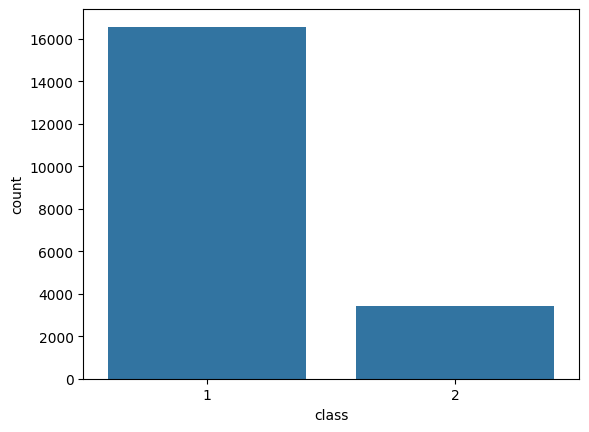

In [22]:
sns.countplot(x='class',data=df)

In [23]:
df['class'].replace({2:0},inplace=True)

<Axes: xlabel='class', ylabel='count'>

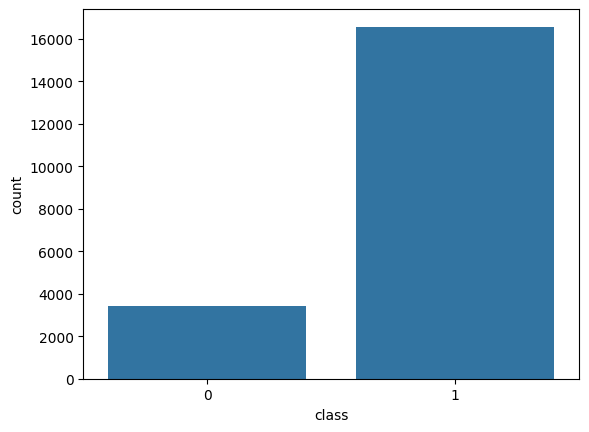

In [24]:
sns.countplot(x='class',data=df)

In [25]:
df.rename(columns={'class':'label'},inplace=True)

In [26]:
df.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [27]:
df.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [28]:
frame=[imbalanced_df,df]
df=pd.concat(frame)

In [29]:
df.head()

,id,label,tweet
0,1.0,0,@user when a father is dysfunctional and is s...
1,2.0,0,@user @user thanks for #lyft credit i can't us...
2,3.0,0,bihday your majesty
3,4.0,0,#model i love u take with u all the time in ...
4,5.0,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

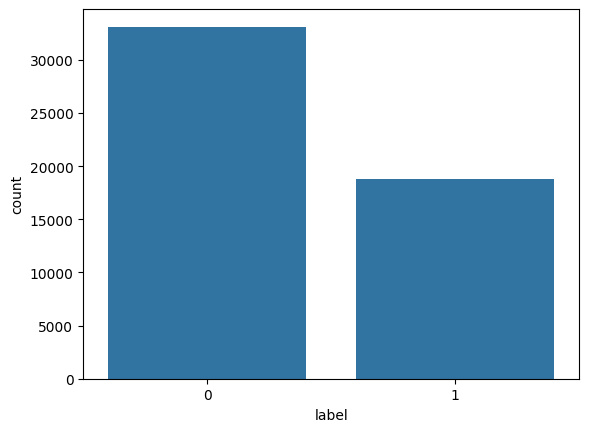

In [30]:
sns.countplot(x='label',data=df)

In [31]:
df.shape

(51933, 3)

In [32]:
import nltk
from nltk.corpus import stopwords
stemmer=nltk.SnowballStemmer('english')
stopword=set(stopwords.words('english'))

In [33]:
def data_cleaning(words):
  words=str(words).lower()
  words=re.sub('\[.*?]','',words)
  words=re.sub('https?://\S+|www\.\S+','',words)
  words=re.sub('<.*?>+','',words)
  words=re.sub('[%s]' % re.escape(string.punctuation),'',words)
  words=re.sub('\n','',words)
  words=re.sub('\w*\d\w*','',words)
  words=[word for word in words.split(' ') if word not in stopword]
  words=' '.join(words)
  words=[stemmer.stem(word) for word in words.split(' ')]
  words=' '.join(words)

  return words

In [34]:
df['tweet']=df['tweet'].apply(data_cleaning)

In [35]:
df['tweet'][3]

,tweet
3,model love u take u time urð± ððð...
3,rt cganderson vivabas look like tranni


In [36]:
df.head(10)

,id,label,tweet
0,1.0,0,user father dysfunct selfish drag kid dysfunc...
1,2.0,0,user user thank lyft credit cant use caus dont...
2,3.0,0,bihday majesti
3,4.0,0,model love u take u time urð± ððð...
4,5.0,0,factsguid societi motiv
5,6.0,0,huge fan fare big talk leav chao pay disput g...
6,7.0,0,user camp tomorrow user user user user user u...
7,8.0,0,next school year year examsð¯ cant think ð...
8,9.0,0,love land allin cav champion cleveland clevela...
9,10.0,0,user user welcom im


In [37]:
x=df['tweet']
y=df['label']


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

38949 38949
12984 12984


In [39]:
max_words=50000
max_len=300
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences=tokenizer.texts_to_sequences(x_train)
sequences_matrix=pad_sequences(sequences,maxlen=max_len)

In [40]:
model=Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
stop=EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='min')

checkpoint=ModelCheckpoint('content/model.keras',monitor='val_loss',verbose=1,save_best_only=True,mode='min')

history=model.fit(sequences_matrix,y_train,batch_size=128,epochs=5,validation_split=0.2,callbacks=[stop,checkpoint])

Epoch 1/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.7897 - loss: 0.4418
Epoch 1: val_loss improved from inf to 0.17603, saving model to content/model.keras
244/244 ━━━━━━━━━━━━━━━━━━━━ 144s 558ms/step - accuracy: 0.7901 - loss: 0.4413 - val_accuracy: 0.9371 - val_loss: 0.1760
Epoch 2/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.9392 - loss: 0.1727
Epoch 2: val_loss improved from 0.17603 to 0.16583, saving model to content/model.keras
244/244 ━━━━━━━━━━━━━━━━━━━━ 135s 552ms/step - accuracy: 0.9393 - loss: 0.1727 - val_accuracy: 0.9412 - val_loss: 0.1658
Epoch 3/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.9480 - loss: 0.1512
Epoch 3: val_loss did not improve from 0.16583
244/244 ━━━━━━━━━━━━━━━━━━━━ 139s 542ms/step - accuracy: 0.9480 - loss: 0.1512 - val_accuracy: 0.9376 - val_loss: 0.1770
Epoch 4/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.9579 - loss: 0.1231
Epoch 4: val_loss improved from 0.16583 to 0.16540, saving model to co

In [42]:
test_sequences=tokenizer.texts_to_sequences(x_test)
test_sequences_matrix=pad_sequences(test_sequences,maxlen=max_len)

In [43]:
accr=model.evaluate(test_sequences_matrix,y_test)

406/406 ━━━━━━━━━━━━━━━━━━━━ 51s 126ms/step - accuracy: 0.9441 - loss: 0.1631


In [44]:
lstm_prediction=model.predict(test_sequences_matrix)

406/406 ━━━━━━━━━━━━━━━━━━━━ 51s 125ms/step


In [45]:
res=[]
for prediction in lstm_prediction:
  if prediction<0.5:
    res.append(0)
  else:
    res.append(1)

In [46]:
print(confusion_matrix(y_test,res))

[[8004  249]
 [ 436 4295]]


In [47]:
import pickle
with open('tokenizer.pickle','wb') as handle:
  pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
# Save the model in the recommended Keras format
model.save("model.keras")

In [49]:
import os

# Check if file exists and its size
print(os.path.getsize('tokenizer.pickle'))  # Should be greater than 0

1936051


In [50]:
# Assuming you have the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [51]:
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)


In [52]:
load_model=tensorflow.keras.models.load_model('model.keras')

In [53]:
test='humans are idiots'
def clean_text(text):
  print(text)
  text=data_cleaning(text)
  return text

test=[clean_text(test)]
print(test)
seq=load_tokenizer.texts_to_sequences(test)
padded=pad_sequences(seq,maxlen=300)
print(seq)
pred=load_model.predict(padded)
if pred<0.5:
  print('No Hate')
else:
  print('Hate and abusive')

humans are idiots
['human idiot']
[[504, 951]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
No Hate
